I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

Description of Variables

*The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =
very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4 =
strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =
some college, 16 = college graduate, 17 = some graduate school, 20
= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =
teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =
professional with advanced degree)

occupation_husb: husband's occupation (same coding as above)

affairs: time spent in extra-marital affairs


In [271]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 
data = sm.datasets.fair.load_pandas().data

In [272]:
#adding "affair" column: 1 represents having affairs, 0 represents not 
data['affair'] = (data.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',
                 data, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

import warnings
warnings.filterwarnings("ignore")

In [273]:
data = data.drop("affairs", axis = 1)

In [274]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [275]:
data.affair.value_counts()

0    4313
1    2053
Name: affair, dtype: int64

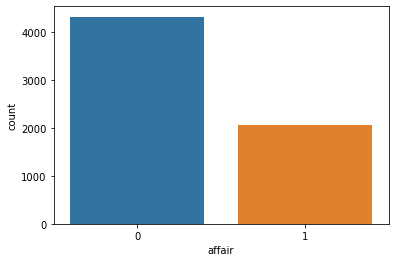

In [276]:
sns.countplot(data.affair)
plt.show()

In [277]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 422.9 KB


### No null values

In [278]:
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [279]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [280]:
import seaborn as sns

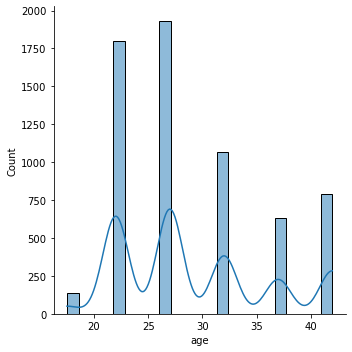

In [281]:
sns.displot(data.age, kde = True)

In [282]:
correlated_data = data.corr()
correlated_data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
rate_marriage,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.331776
age,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,0.146519
yrs_married,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,0.203109
children,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,0.159833
religious,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.129299
educ,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.075280
occupation,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.028981
occupation_husb,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,0.017637
affair,-0.331776,0.146519,0.203109,0.159833,-0.129299,-0.075280,0.028981,0.017637,1.000000


<AxesSubplot:>

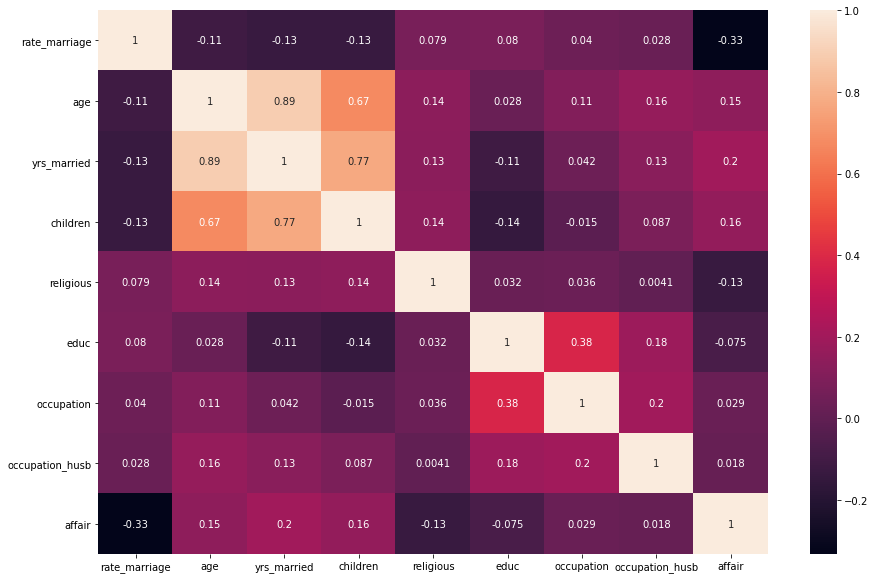

In [283]:
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(correlated_data, annot = True, ax= ax)

### Applying Logistic Regression

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
X = data.drop("affair", axis = 1)
y = data.affair

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 24 )

In [286]:
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [287]:
y_predict = logit.predict(X_test)

In [288]:
df = pd.DataFrame({"y_true":y_test, "y_predict":y_predict})
df.head()

,y_true,y_predict
5861,0,0
692,1,0
4895,0,0
1641,1,0
4344,0,0


In [289]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [290]:
from sklearn.metrics import precision_score, recall_score

In [291]:
confusion_matrix(df.y_true,df.y_predict)

array([[785,  77],
       [265, 147]], dtype=int64)

In [292]:
pd.crosstab(df.y_true,df.y_predict).T

y_true,0,1
y_predict,,
0,785,265
1,77,147


In [293]:
print("Accuracy score :",accuracy_score(df.y_true,df.y_predict))
print("precision score :", precision_score(df.y_true, df.y_predict))
print("recall score :", recall_score(df.y_true, df.y_predict))
print("f1 score :", f1_score(df.y_true,df.y_predict))

Accuracy score : 0.7315541601255887
precision score : 0.65625
recall score : 0.3567961165048544
f1 score : 0.4622641509433963


### ROC Curve

In [294]:
from sklearn.metrics import roc_auc_score, roc_curve

In [295]:
roc_auc_score(df.y_true, df.y_predict)
roc_curve(df.y_true, df.y_predict)

(array([0.        , 0.08932715, 1.        ]),
 array([0.        , 0.35679612, 1.        ]),
 array([2, 1, 0]))

In [296]:
y_pred_probalility = logit.predict_proba(X_test)
y_pred_probalility[:10]

array([[0.71173633, 0.28826367],
       [0.65740698, 0.34259302],
       [0.88630865, 0.11369135],
       [0.60600399, 0.39399601],
       [0.75064045, 0.24935955],
       [0.82724866, 0.17275134],
       [0.89009311, 0.10990689],
       [0.69775207, 0.30224793],
       [0.592116  , 0.407884  ],
       [0.74525983, 0.25474017]])

In [297]:
y_pred_probalility = y_pred_probalility[:,1]

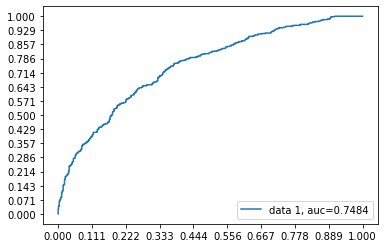

In [298]:
fpr, tpr, t = roc_curve(y_test, y_pred_probalility)

auc = roc_auc_score(y_test, y_pred_probalility)


plt.plot(fpr,tpr,label="data 1, auc="+str(round(auc, 4)))
plt.xticks(np.linspace(0, 1, 10))
plt.yticks(np.linspace(0,1,15))
plt.legend(loc=4)
plt.show()

In [299]:
df = pd.DataFrame({"TPR" : tpr , "FPR" : fpr , "threshold" : t})
df.tail(60)

,TPR,FPR,threshold
482,0.958738,0.801624,0.135148
483,0.958738,0.806265,0.134132
484,0.958738,0.808585,0.133536
485,0.958738,0.814385,0.131698
486,0.958738,0.816705,0.131410
487,0.958738,0.817865,0.131142
488,0.958738,0.820186,0.130873
489,0.961165,0.820186,0.129663
490,0.961165,0.823666,0.128967
491,0.963592,0.823666,0.128935


In [300]:
t = 0.125181
lst = []
for p in y_pred_probalility:
    if(p>=t):
        lst.append(1)
    else:
        lst.append(0)

In [301]:
y_test_predicted = pd.Series(lst)
print("accuracy score :", accuracy_score(y_test, y_test_predicted))
print("precision score :",precision_score(y_test, y_test_predicted))
print("recall score :",recall_score(y_test, y_test_predicted))
print("f1 score :", f1_score(y_test,y_test_predicted))

accuracy score : 0.423861852433281
precision score : 0.35625
recall score : 0.9684466019417476
f1 score : 0.52088772845953


### Using Grid SearchCV for tuning the hyper-parameters¶

In [302]:
logit1 = LogisticRegression()

In [303]:
logit1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [304]:
y_pred = logit1.predict(X_test)
df = pd.DataFrame({"y_true":y_test, "y_pred":y_pred})
accuracy_score(df.y_true,df.y_pred)

0.7315541601255887

In [305]:
from sklearn.model_selection import GridSearchCV
cost_values = np.logspace(-3,3,8)
param_grid = {"C" : cost_values}
grid = GridSearchCV(estimator=logit, param_grid = param_grid, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e-03, 7.19685673e-03, 5.17947468e-02, 3.72759372e-01,
       2.68269580e+00, 1.93069773e+01, 1.38949549e+02, 1.00000000e+03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [306]:
grid.best_params_

{'C': 138.9495494373136}

In [307]:
lore = grid.best_estimator_

In [308]:
lore.fit(X_train, y_train)

LogisticRegression(C=138.9495494373136, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
pred = lore.predict(X_test)

In [310]:
df = pd.DataFrame({"y_true": y_test, "y_pred":pred})
df.head()

,y_true,y_pred
5861,0,0
692,1,0
4895,0,0
1641,1,0
4344,0,0


In [319]:
print("Accuracy score :","\t",accuracy_score(df.y_true,df.y_pred))
print("precision score :","\t", precision_score(df.y_true, df.y_pred))
print("recall score :","\t","\t", recall_score(df.y_true, df.y_pred))
print("f1 score :","\t","\t", f1_score(df.y_true,df.y_pred))

Accuracy score : 	 0.7307692307692307
precision score : 	 0.6506550218340611
recall score : 	 	 0.3616504854368932
f1 score : 	 	 0.4648985959438377
